In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import os
import numpy as np
import tensorflow as tf

In [3]:
# Load data
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets('data/mnist', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist/t10k-images-idx3-ubyte.gz
Extracting data/mnist/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
X_train = mnist.train.images
X_test = mnist.test.images
X_val = mnist.validation.images

In [6]:
y_train = mnist.train.labels
y_test = mnist.test.labels
y_val = mnist.validation.labels

In [7]:
X_train.shape

(55000, 784)

In [8]:
# Placehoder
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

In [9]:
# Variable
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [10]:
# Model hyper parameters
learning_rate = 0.01
batch_size = 128
nb_epochs = 100

In [11]:
# Define graphs
logits = tf.matmul(X, W) + b
y_pred = tf.nn.softmax(logits=logits)

In [12]:
# Loss function
entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y)
loss = tf.reduce_mean(entropy)
correct_preds = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [13]:
# Accuracy
accuracy = tf.reduce_mean(tf.cast(correct_preds, tf.float32))

In [14]:
# Optimizer
# optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [15]:
# Init variables
init = tf.global_variables_initializer()

In [16]:
sess = tf.Session()

In [17]:
sess.run(init)

In [18]:
# Training
nb_batch = X_train.shape[0] // batch_size

for i in range(nb_epochs):
    for _ in range(nb_batch):
        X_batch, y_batch = mnist.train.next_batch(batch_size=batch_size)
        _, batch_loss = sess.run([optimizer, loss], feed_dict={X: X_batch, y: y_batch})
    
    if i % 10 == 0:
        _, val_loss, val_accuracy = sess.run([optimizer, loss, accuracy], feed_dict={X: X_val, y: y_val})
        print('Epoch {} val_loss = {} val_accuracy = {}'.format(i, val_loss, val_accuracy))

Epoch 0 val_loss = 0.8397408127784729 val_accuracy = 0.8434000015258789
Epoch 10 val_loss = 0.3787250816822052 val_accuracy = 0.8984000086784363
Epoch 20 val_loss = 0.33466634154319763 val_accuracy = 0.9100000262260437
Epoch 30 val_loss = 0.3152075707912445 val_accuracy = 0.9139999747276306
Epoch 40 val_loss = 0.3037673234939575 val_accuracy = 0.9160000085830688
Epoch 50 val_loss = 0.2960595488548279 val_accuracy = 0.9182000160217285
Epoch 60 val_loss = 0.2905699610710144 val_accuracy = 0.920799970626831
Epoch 70 val_loss = 0.28620535135269165 val_accuracy = 0.921999990940094
Epoch 80 val_loss = 0.2828529179096222 val_accuracy = 0.9229999780654907
Epoch 90 val_loss = 0.28024405241012573 val_accuracy = 0.923799991607666


In [19]:
_, test_loss, test_accuracy = sess.run([optimizer, loss, accuracy], feed_dict={X: X_test, y: y_test})
print('Epoch {} test_loss = {} test_accuracy = {}'.format(i, test_loss, test_accuracy))

Epoch 99 test_loss = 0.2830537259578705 test_accuracy = 0.9208999872207642


6
6


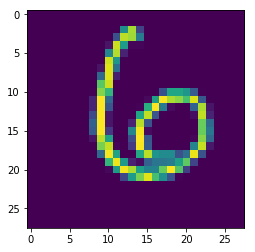

In [24]:
import matplotlib.pyplot as plt

def show_result(X_true, y_true):
    plt.imshow(X_true.reshape(28, 28))
    print(np.argmax(y_true))
    y_preds = sess.run(y_pred, feed_dict={X : [X_true]})
    
    print(np.argmax(y_preds))
    
show_result(X_test[100], y_test[100])
plt.show()